In [1]:
%matplotlib inline

In [2]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# File to Load 
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data_df = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
combined_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2018 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2018 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2018 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2018 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2018 4:28,34.58,3.908450e+12,46,Urban


In [4]:
# Find average fare per city
average_fare = combined_data_df.groupby("city")["fare"].mean()
average_fare

city
Amandaburgh             24.641667
Barajasview             25.332273
Barronchester           36.422500
Bethanyland             32.956111
Bradshawfurt            40.064000
Brandonfort             35.437368
Carriemouth             28.314444
Christopherfurt         24.501852
Colemanland             30.894545
Davidfurt               31.995882
Deanville               25.842632
East Aaronbury          25.661111
East Danielview         31.560588
East Kaylahaven         23.757931
East Kentstad           29.823077
East Marymouth          30.835185
Erikaland               24.906667
Garzaport               24.123333
Grahamburgh             25.221200
Grayville               27.763333
Harringtonfort          33.470000
Huntermouth             28.993750
Hurleymouth             25.891429
Jerryton                25.649200
Jessicaport             36.013333
Johnton                 26.785714
Joneschester            22.289600
Josephside              32.858148
Justinberg              23.694333
Karenberg

In [5]:
# Find the total amount of rides per city
total_rides = combined_data_df.groupby("city")["ride_id"].count()
total_rides

city
Amandaburgh             18
Barajasview             22
Barronchester           16
Bethanyland             18
Bradshawfurt            10
Brandonfort             19
Carriemouth             27
Christopherfurt         27
Colemanland             22
Davidfurt               17
Deanville               19
East Aaronbury           9
East Danielview         17
East Kaylahaven         29
East Kentstad           13
East Marymouth          27
Erikaland               12
Garzaport                3
Grahamburgh             25
Grayville               15
Harringtonfort           6
Huntermouth             24
Hurleymouth             28
Jerryton                25
Jessicaport              6
Johnton                 21
Joneschester            25
Josephside              27
Justinberg              30
Karenberg               17
                        ..
South Evanton           31
South Jack              19
South Jennifer           7
South Karenland         38
South Latoya            19
South Marychester      

In [58]:
# Find the total number of drivers per city
total_drivers = combined_data_df.groupby("city")["driver_count"].mean()
total_drivers

city
Amandaburgh             12
Barajasview             26
Barronchester           11
Bethanyland             22
Bradshawfurt             7
Brandonfort             10
Carriemouth             52
Christopherfurt         41
Colemanland             23
Davidfurt               23
Deanville               49
East Aaronbury           7
East Danielview         22
East Kaylahaven         65
East Kentstad           20
East Marymouth           5
Erikaland               37
Garzaport                7
Grahamburgh             61
Grayville                2
Harringtonfort           4
Huntermouth             37
Hurleymouth             36
Jerryton                64
Jessicaport              1
Johnton                 27
Joneschester            39
Josephside              25
Justinberg              39
Karenberg               22
                        ..
South Evanton           11
South Jack              46
South Jennifer           7
South Karenland          4
South Latoya            10
South Marychester      

In [59]:
city_type = city_data.set_index('city')['type']

city_type.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [60]:
total_cities = pd.DataFrame({"Average Fare Per City": average_fare, 
                             "Number of Rides": total_rides, 
                             "Number of Drivers": total_drivers,
                             "City Type": city_type})
total_cities.head()

,Average Fare Per City,Number of Rides,Number of Drivers,City Type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


In [9]:
# Urban
urban = total_cities.loc[total_cities["City Type"] == "Urban"]

# Suburban
suburban = total_cities.loc[total_cities["City Type"] == "Suburban"]

# Rural
rural = total_cities.loc[total_cities["City Type"] == "Rural"]

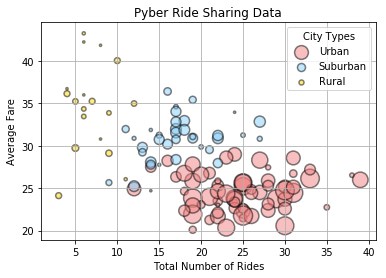

In [14]:
#Urban
plt.scatter(urban["Number of Rides"], urban["Average Fare Per City"], c="lightcoral", edgecolors="black", s = urban["Number of Drivers"]*5, label="Urban", alpha = 0.5, linewidth = 1.5, marker="o")

# Suburban
plt.scatter(suburban["Number of Rides"], suburban["Average Fare Per City"], c="lightskyblue", edgecolors="black", s = suburban["Number of Drivers"]*5, label="Suburban", alpha = 0.5, linewidth = 1.5, marker="o")

# Rural
plt.scatter(rural["Number of Rides"], rural["Average Fare Per City"], c="gold", edgecolors="black", s = rural["Number of Drivers"]*5, label="Rural", alpha = 0.5, linewidth = 1.5, marker="o" )

# Add other graph properties
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides")
plt.ylabel("Average Fare")
plt.grid(True)

# Make a legend
plt.legend(loc="best", title="City Types")

plt.show()

In [61]:
city_fare_pie = combined_data_df.groupby(["type"])["fare"].sum()
city_fare_pie

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [19]:
city_fare_pie.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

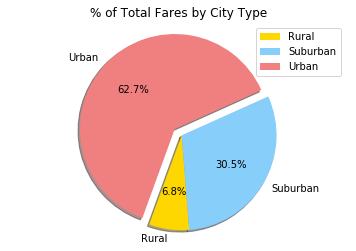

In [40]:
#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

#Only explode the third section of the pie chart.

explode = (0,0, 0.1)

#Create the pie chart.
plt.pie(city_fare_pie, labels = city_fare_pie.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = -110)


#Add the legend.
plt.legend(loc = "upper right")
plt.axis("equal")

# Add title
plt.title("% of Total Fares by City Type")


#Show the chart.
plt.show()

In [63]:
city_rides_pie = combined_data_df.groupby(["type"])["ride_id"].count()
city_rides_pie

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [42]:
city_rides_pie.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

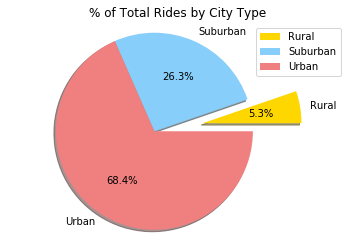

In [53]:
#Use the City Pie index for wedge labels.
city_rides_pie.index

#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

#Only explode the first section of the pie chart.
explode = (0.5,0,0)

#Create the pie chart.
plt.pie(city_rides_pie, labels = city_fare_pie.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True)

#Tell Matplotlib that we wnat the pie chart to have equal axes.
plt.axis("equal")

#Add the legend.
plt.legend(loc = "upper right")

#Add title
plt.title("% of Total Rides by City Type")

#Show the chart.
plt.show()

In [66]:
city_drivers_pie = combined_data_df.groupby(["type"])["driver_count"].mean()
city_drivers_pie

type
Rural        4.296000
Suburban    13.712000
Urban       36.678154
Name: driver_count, dtype: float64

In [68]:
city_drivers_pie.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

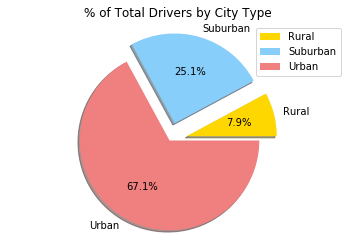

In [71]:
#Use the City Pie index for the wedge labels.
city_drivers_pie.index

#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

#explode the first and second segments of the pie chart.

explode = (0.2,0.2,0)

#Create the pie chart.
plt.pie(city_drivers_pie, labels = city_fare_pie.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True)

#Tell Matplotlib that we want the chart to have equal axes.
plt.axis("equal")

#Add the legend.
plt.legend(loc = "upper right")

# Add title
plt.title("% of Total Drivers by City Type")

#Show the pie chart.
plt.show()